# Hurt people hurt people

## Finite difference replicator-mutator equation

- $x_T$: proportion of population that is traumatised.
- $x_S$: proportion of population that is not traumatised.
- $p$: probability of non traumatised people becoming traumatised.
- $q$: probability of healing.
- $f_T$: the fitness of a traumatised individual $f_T=\alpha f_S$ where $\alpha > 1$
- $f_S$: the fitness of a non traumatised individual
- $\bar f$: the average fitness $\bar f=x_T f_T + x_S f_S$

The equation:


$$x_i'=\sum_{j\in\{T, S\}}\frac{x_jf_jQ_{ji}}{\bar f}\text{ for }i\in\{T,S\}$$

equivalently:

$$x_{j}^{(t + 1)}=\sum_{j\in\{T, S\}}\frac{x_j^{(t)}f_jQ_{ji}}{\bar f}\text{ for }i\in\{T,S\}$$

we have:

$$
Q = 
\begin{pmatrix}
    1 - q & q\\
    p     & 1 - p
\end{pmatrix}
$$


which gives:


$$x_T'=\frac{x_Tf_T(1 - q) + x_Sf_Tp}{\bar f}$$


### Self sustaining proportion of trauma when $Q_T = x_T' / x_T \geq 1$

$$
\begin{aligned}
Q_T =  \frac{x_T'}{x_T} & = \frac{1}{x_T}\frac{x_T\alpha f_S(1 - q) + (1 - x_T)f_Sp}{x_T \alpha f_S + (1 -x_T) f_S}\\
                        & = \frac{1}{x_T}\frac{x_T\alpha (1 - q) + p - x_Tp}{x_T \alpha  + (1 -x_T) }\\
                        & = \frac{1}{x_T}\frac{x_T(\alpha(1 - q) - p) + p}{x_T (\alpha - 1) + 1 }\\
\end{aligned}
$$

If $p = q = 0$:

$$
\begin{aligned}
Q_T = \frac{\alpha}{x_T (\alpha - 1) + 1 }\\
\end{aligned}
$$

which is $\geq 1$ when $\alpha \geq 1$ because: $x_T(\alpha - 1) + 1 - \alpha = (x_T - 1)(\alpha - 1) < 0$.

Other interesting cases to show algebraically:

- If $p = \beta q$:
    - $\alpha > 1$, $\beta > 1$: we expect $Q_T > 1$ (fitness advantage and in flow)
    - $\alpha > 1$, $\beta < 1$: we expect a condition on $Q_T$ (fitness advantage but out flow)
    - $\alpha < 1$, $\beta < 1$: we expect $Q_T < 1$ (fitness disadvantage and out flow due to healing) -- this strays from premis of fitness advantage
    - $\alpha < 1$, $\beta > 1$: we expect a condition on $Q_T$ (fitness disadvantage and in flow)  -- this strays from premis of fitness advantage
- If $p=0$ and $q>0$:
    - If $\alpha=1$ $x_T\to 0$
    - If $\alpha>1$ $x_T \to \epsilon$ depending on some relationship between $\alpha$ and $q$.
- If $p>0$ then $x_T > 0$.
- Some sort of family of approximation results based on things like $\beta$ is close to 1 ($\beta = 1 + \epsilon$ etc...).

In [36]:
import matplotlib.pyplot as plt

def get_x_T_prime(x_T, f_S, alpha, p, q):
    x_S = 1 - x_T
    f_T = alpha * f_S
    f_bar = x_T * f_T + x_S * f_S
    
    numerator = x_T * f_T * (1 - q) + x_S * f_S * p
    return numerator / f_bar

In [37]:
def simulation(x_T, f_S, alpha, p, q, number_of_iterations):
    yield x_T

    for _ in range(number_of_iterations):
        x_T = get_x_T_prime(x_T, f_S, alpha, p, q)
        yield x_T

In [40]:
x_T = .5
f_S = 1
alpha = 1.5
p = 0
q = 0
number_of_iterations = 100

results = simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
)
list(results)[-1]

0.9999999999999997

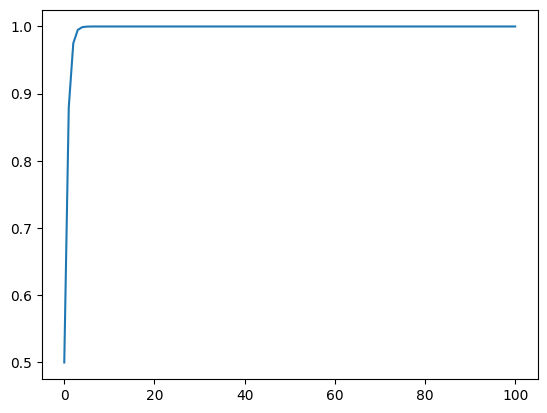

In [41]:
x_T = .5
f_S = 1
alpha = 1.5
p = .7
q = 0
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results);

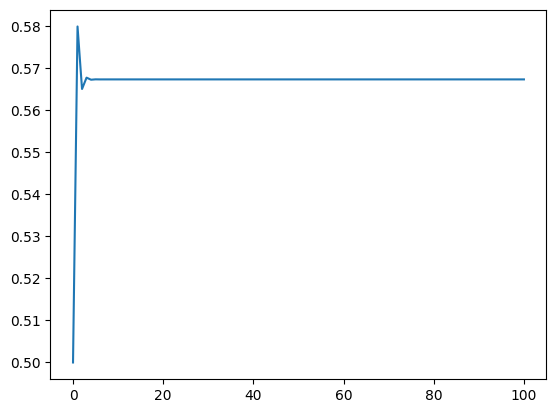

In [43]:
x_T = .5
f_S = 1
alpha = 1.5
p = .7
q = .5
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results);

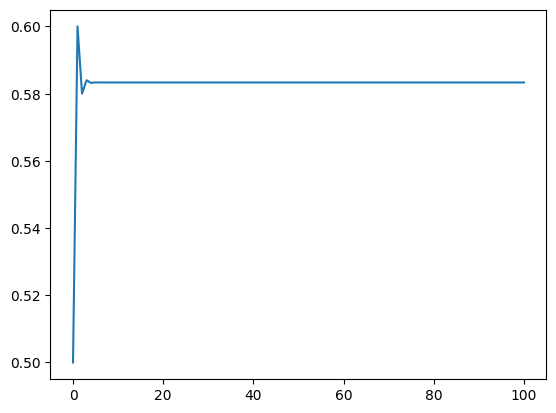

In [44]:
x_T = .5
f_S = 1
alpha = 1
p = .7
q = .5
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results);

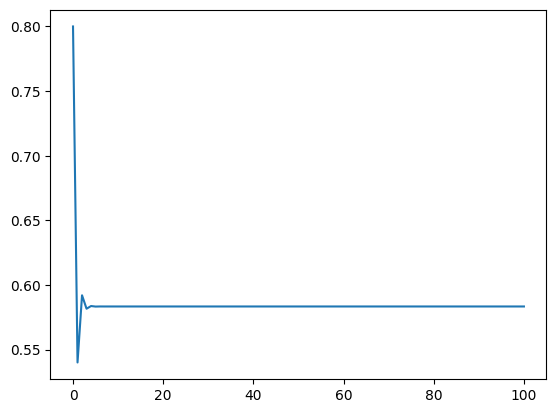

In [53]:
x_T = .8
f_S = 1
alpha = 1
p = .7
q = .5
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results);

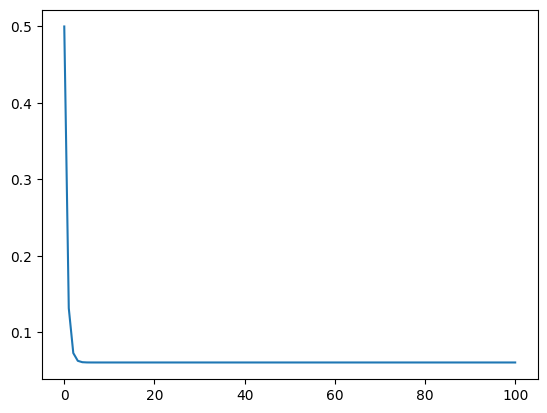

In [47]:
x_T = .5
f_S = 1
alpha = 1.2
p = .05
q = .8
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results);

Text(0.5, 1.0, '0.05980997195835432')

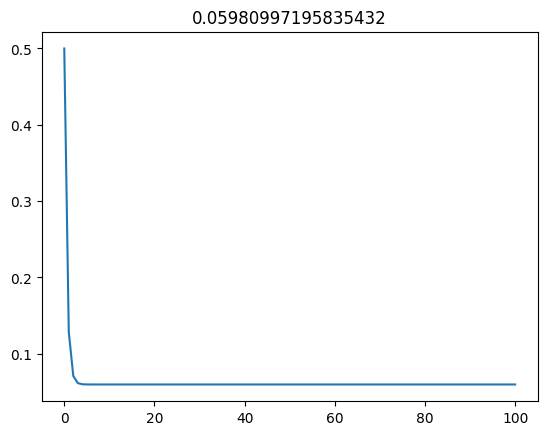

In [54]:
x_T = .5
f_S = 1
alpha = 1.1
p = .05
q = .8
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results)
plt.title(results[-1])

Text(0.5, 1.0, '1.0185179881672491e-10')

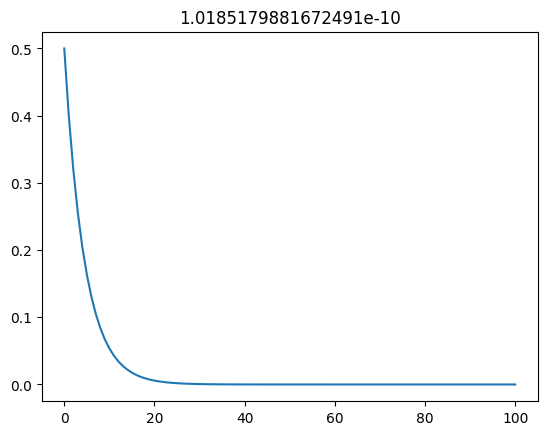

In [55]:
x_T = .5
f_S = 1
alpha = 1
p = 0
q = .2
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results)
plt.title(results[-1])

Text(0.5, 1.0, '0.40000000096597405')

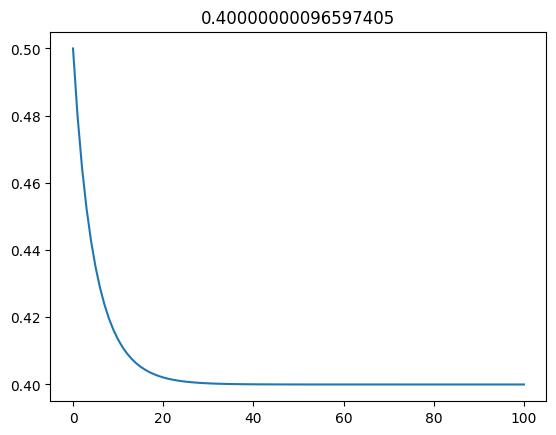

In [58]:
x_T = .5
f_S = 1
alpha = 1.5
p = 0
q = .2
number_of_iterations = 100

results = list(simulation(
    x_T=x_T, 
    f_S=f_S, 
    alpha=alpha, 
    p=p, 
    q=q, 
    number_of_iterations=number_of_iterations,
))

plt.figure()
plt.plot(results)
plt.title(results[-1])

### Using only the replicator dynamics equation (without the mutation transition matrix)

In this case:

$$
\begin{aligned}
f_T =& \alpha f_S - qf_t + pf_S\\
f_S =& f_S
\end{aligned}
$$

which gives:

$$
\begin{aligned}
f_T =& \frac{\alpha + p}{1 + q}f_S\\
f_S =& f_S
\end{aligned}
$$

Not sure this goes anywhere.

### Finite population model

State?

### Agent Based model

In [64]:
import random

class Individual:

    probability_of_healing = .4
    probability_of_ambient_trauma = .1
    def __init__(
        self, 
        age=0, 
        number_of_aces=None,
        parents=None,

    ):
        self.parents = parents

        self.age = age
        
        if number_of_aces is None:
            self.number_of_aces = random.randint(0, 4)
        else:
            self.number_of_aces = number_of_aces
    
    def have_a_birthday(self):
        self.age += 1

        delta = 0
        if random.random() < self.probability_of_healing:
            delta -= 1

        if random.random() < self.probability_of_ambient_trauma:
            delta += 1

        if self.parents is not None:
            if (self.parents[0].number_of_aces + self.parents[1].number_of_aces) > 0 and self.age < 14:
                delta += random.randint(0, 1)
        
        self.number_of_aces = min(7, max(self.number_of_aces + delta, 0))
        
    def get_probability_of_reproducing(self):
        """
        TODO: A more considered function of trauma is needed here.

        We want the probability to be some piecewise (intervals on age) continuous function of trauma.

        This uses the data in first table of 
        
        https://journals.sagepub.com/doi/full/10.1177/0022146519868842#:~:text=We%20draw%20on%20evidence%20that,ACEs%20on%20women%27s%20later%2Dlife
        """
        if self.age < 14:
            return 0
        if  self.age <= 19:

            if self.number_of_aces == 0:
                return .446 / 5
            if self.number_of_aces == 1:
                return .308 / 5
            if self.number_of_aces == 2:
                return .140 / 5
            return .106 / 5
        if self.age <= 24:
            if self.number_of_aces == 0:
                return .459 / 4
            if self.number_of_aces == 1:
                return .293 / 4
            if self.number_of_aces == 2:
                return .135 / 4
            return .112 / 4
        if self.age <= 39:
            if self.number_of_aces == 0:
                return .568 / 11
            if self.number_of_aces == 1:
                return .224 / 11
            if self.number_of_aces == 2:
                return .130 / 11
            return .770 / 11
        return 0
    
    def die(self):
        """
        Get better death function.
        """
        if self.age > 40:
            return True
        return random.random() < .01

    def reproduce(self, other):
        probabilities = self.get_probability_of_reproducing(), other.get_probability_of_reproducing()
        if (min(probabilities) > 0)  and (random.random() < 2 * self.get_probability_of_reproducing()):
            epigenetic_trauma = random.randint(0, (self.number_of_aces + other.number_of_aces) // 2)
            return Individual(age=0, number_of_aces=epigenetic_trauma, parents=(self, other))
        return None


class Population:

    def __init__(self, initial_size):
        self.individuals = [Individual(age=14) for _ in range(initial_size)]

    def run(self, iterations):
        for _ in range(iterations):
    
            yield self.individuals
            new_generation = []
            
            for individual in self.individuals:
                individual.have_a_birthday()
                if individual.die() is False:
                    new_generation.append(individual)
                    
            random.shuffle(new_generation)
            size_of_new_generation = len(new_generation)


            for first, second in zip(
                new_generation[:size_of_new_generation // 2], 
                new_generation[size_of_new_generation // 2:]
            ):
                new_individual = first.reproduce(second)
                if new_individual is not None:
                    new_generation.append(new_individual)
            self.individuals = new_generation






In [65]:
individual = Individual(age=14, number_of_aces=0)
individual.get_probability_of_reproducing(), individual.age

(0.0892, 14)

In [66]:
## import numpy as np

population = Population(initial_size=1_000)
for i, generation in enumerate(population.run(iterations=200)):
    if i % 10 == 0:
        print("\n")
        print("=" * 10)
        print(f"Number of individuals {len(generation)}")
        print(f"Min age: {np.min([individual.age for individual in generation])}")
        print(f"Mean age: {np.mean([individual.age for individual in generation])}")
    
        print(f"Max age: {np.max([individual.age for individual in generation])}")






Number of individuals 1000
Min age: 14
Mean age: 14.0
Max age: 14


Number of individuals 1425
Min age: 0
Mean age: 16.865263157894738
Max age: 24


Number of individuals 1578
Min age: 0
Mean age: 22.70785804816223
Max age: 34


Number of individuals 1053
Min age: 0
Mean age: 15.236467236467236
Max age: 29


Number of individuals 1218
Min age: 0
Mean age: 20.58456486042693
Max age: 39


Number of individuals 1042
Min age: 0
Mean age: 19.63147792706334
Max age: 40


Number of individuals 960
Min age: 0
Mean age: 20.604166666666668
Max age: 40


Number of individuals 826
Min age: 0
Mean age: 19.329297820823246
Max age: 40


Number of individuals 803
Min age: 0
Mean age: 19.870485678704856
Max age: 40


Number of individuals 716
Min age: 0
Mean age: 19.951117318435752
Max age: 40


Number of individuals 663
Min age: 0
Mean age: 19.92609351432881
Max age: 40


Number of individuals 586
Min age: 0
Mean age: 19.70136518771331
Max age: 40


Number of individuals 548
Min age: 0
Mean age: 19.

In [247]:
me.age

21

In [105]:
me.trauma

0.2975390721099045

In [106]:
me.get_probability_of_reproducing()

0.2

In [108]:
for _ in range(50):
    print(me.reproduce(other))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [109]:
me.have_a_birthday()

In [110]:
me.age

21

In [111]:
me.trauma

0.32753907210990446

# Friday morning notes

We started looking at convergence values.

In [192]:
import sympy as sym

symbolic_alpha = sym.Symbol("alpha")
symbolic_p = sym.Symbol("p")
symbolic_q = sym.Symbol("q")
symbolic_beta = sym.Symbol("beta")

def get_lhs(alpha, p, q):
    x = sym.Symbol("x")
    lhs=(alpha - 1) * x ** 2 + (1 + p - alpha + alpha * q) * x - p
    return lhs

def get_convergence(alpha, p, q):
    x = sym.Symbol("x")
    lhs = get_lhs(alpha=alpha, p=p, q=q)
    return sym.solveset(lhs, x)

In [194]:
for root in get_convergence(alpha=symbolic_alpha, p=symbolic_p, q=symbolic_q):
    print(sym.limit(root, symbolic_alpha, 0))

p/2 + sqrt(p**2 - 2*p + 1)/2 + 1/2
p/2 - sqrt(p**2 - 2*p + 1)/2 + 1/2


In [177]:
sym.factor(get_convergence(alpha=1, p=symbolic_p, q=symbolic_p))

{1/2}

In [169]:
get_convergence(alpha=symbolic_alpha, p=symbolic_p, q=symbolic_q)

{-(alpha*q - alpha + p + 1)/(2*(alpha - 1)) - sqrt(alpha**2*q**2 - 2*alpha**2*q + alpha**2 + 2*alpha*p*q + 2*alpha*p + 2*alpha*q - 2*alpha + p**2 - 2*p + 1)/(2*(alpha - 1)), -(alpha*q - alpha + p + 1)/(2*(alpha - 1)) + sqrt(alpha**2*q**2 - 2*alpha**2*q + alpha**2 + 2*alpha*p*q + 2*alpha*p + 2*alpha*q - 2*alpha + p**2 - 2*p + 1)/(2*(alpha - 1))}

## Using a lognormal distribution to simulate number of births.

In [199]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
3 / 60

0.05

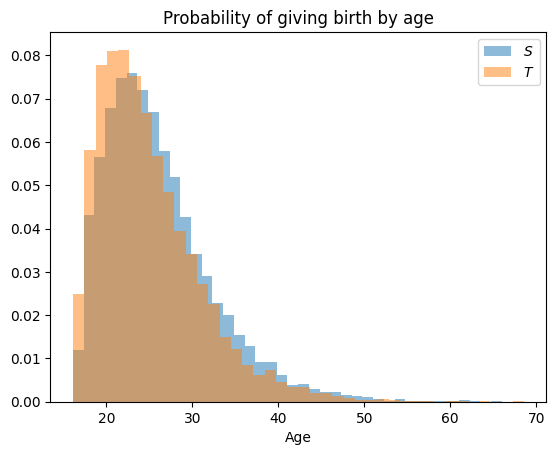

In [237]:
N = 10_000

shape = 2.5
scale = 4
sigma = .9
kappa = 1
bins = 40
lower_bound = 16

plt.figure()
plt.hist(np.random.gamma(shape=shape, scale=scale, size=N) + lower_bound, bins=bins, density=True, label="$S$", alpha=.5)
plt.hist(np.random.gamma(shape=sigma * shape, scale=kappa * scale, size=N) + lower_bound, bins=bins, density=True, label="$T$", alpha=.5)
plt.title("Probability of giving birth by age")
plt.xlabel("Age")
plt.legend();

In [221]:
np.random.gamma?

Docstring:
gamma(shape, scale=1.0, size=None)

Draw samples from a Gamma distribution.

Samples are drawn from a Gamma distribution with specified parameters,
`shape` (sometimes designated "k") and `scale` (sometimes designated
"theta"), where both parameters are > 0.

.. note::
    New code should use the `~numpy.random.Generator.gamma`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
shape : float or array_like of floats
    The shape of the gamma distribution. Must be non-negative.
scale : float or array_like of floats, optional
    The scale of the gamma distribution. Must be non-negative.
    Default is equal to 1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``shape`` and ``scale`` are both scalars.
    Otherwise, ``np.broadcast(shape, scal